### LOANPURPOSE

In [1]:
# Importando Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Importado Data set
data = pd.read_excel("german_credit_data.xlsx")
data

,CUSTOMERID,CHECKINGSTATUS,LOANDURATION,CREDITHISTORY,LOANPURPOSE,LOANAMOUNT,EXISTINGSAVINGS,EMPLOYMENTDURATION,INSTALLMENTPERCENT,SEX,...,OWNSPROPERTY,AGE,INSTALLMENTPLANS,HOUSING,EXISTINGCREDITSCOUNT,JOB,DEPENDENTS,TELEPHONE,FOREIGNWORKER,RISK
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,e77fa77b-78da-4607-a2fa-ede36c1e968f,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,...,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
4996,6e71db4b-375c-42e1-b4a8-3292c007967a,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,...,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
4997,db501d22-e0c9-4f38-bf05-7f2c1df35395,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,...,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
4998,802055d6-6aa7-4532-bf1c-0b8b114b483d,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


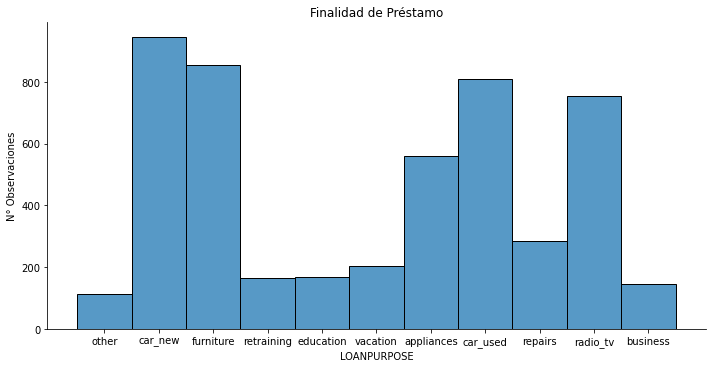

In [3]:
sns.displot(data["LOANPURPOSE"], aspect=2)
plt.title("Finalidad de Préstamo")

plt.ylabel("N° Observaciones")
plt.show()


In [4]:
data["LOANPURPOSE"].describe()

count        5000
unique         11
top       car_new
freq          945
Name: LOANPURPOSE, dtype: object

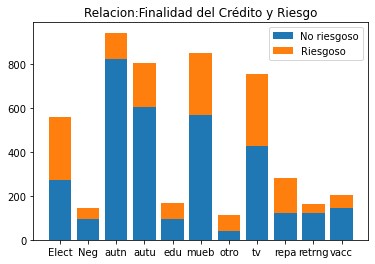

In [5]:
labels= ["appliances","business","car_new","car_used","education","furniture","other","radio_tv","repairs","retraining","vacation"]
labels1 = ["Elect","Neg","autn","autu","edu","mueb","otro","tv","repa","retrng","vacc",]
no_risk = [274,94,827,608,97,569,40,429,123,122,147]
risk    = [287,52,118,200,70,284,73,326,160,42,58]
width = 0.80


fig,ax=plt.subplots()
ax.bar(labels1,no_risk, width, label="No riesgoso")
ax.bar(labels1,risk, width, label="Riesgoso", bottom=no_risk)

ax.set_title("Relacion:Finalidad del Crédito y Riesgo")
ax.legend()
plt.show()


### LOANAMOUNT

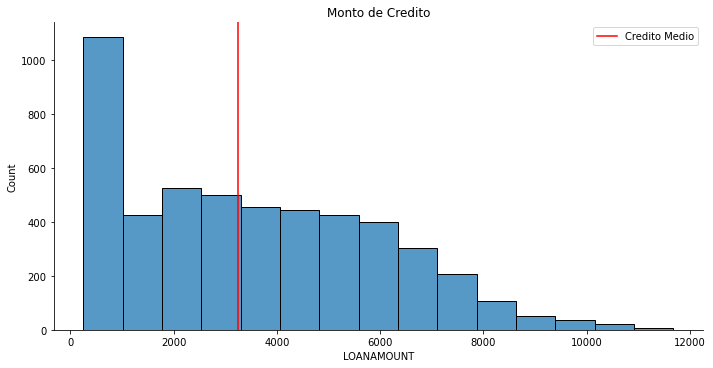

In [6]:
sns.displot(data["LOANAMOUNT"], bins=15, aspect=2)
plt.title("Monto de Credito")

media = statistics.median(data["LOANAMOUNT"])
plt.axvline(media, label="Credito Medio", color="red")

plt.legend()
plt.show()

In [7]:
data["LOANAMOUNT"].describe()

count     5000.000000
mean      3480.145000
std       2488.232783
min        250.000000
25%       1326.750000
50%       3238.500000
75%       5355.000000
max      11676.000000
Name: LOANAMOUNT, dtype: float64

Text(0.5, 1.0, 'Boxplot del Credito')

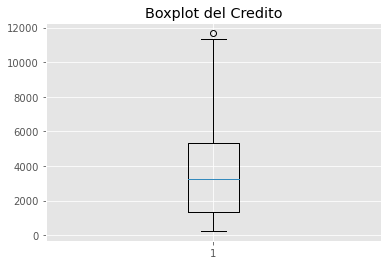

In [8]:
bx1 = data["LOANAMOUNT"]
plt.style.use("ggplot")
plt.boxplot(bx1)
plt.title("Boxplot del Credito")

In [9]:
data_r = pd.read_excel("x_y.xlsx")
data_r

,LOANAMOUNT,RISK2
0,1889,0
1,462,0
2,250,0
3,3693,0
4,6235,1
...,...,...
995,6041,1
996,250,0
997,6981,1
998,2705,0


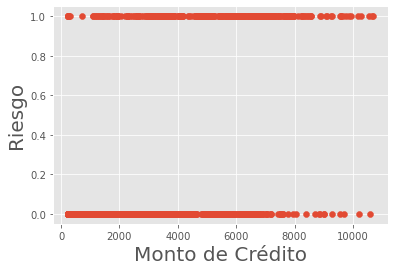

In [10]:
X1 = data_r["LOANAMOUNT"]
y = data_r["RISK2"]

plt.scatter(X1,y)
plt.xlabel("Monto de Crédito", fontsize = 20)
plt.ylabel("Riesgo", fontsize = 20)
plt.show()

In [11]:
x = sm.add_constant(X1) 
results = sm.OLS(y,x).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RISK2   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     233.0
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.96e-47
Time:                        10:51:51   Log-Likelihood:                -559.46
No. Observations:                1000   AIC:                             1123.
Df Residuals:                     998   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0481      0.023      2.107      0.035       0.003       0.093
LOANAMOUNT  8.018e-05   5.25e-06     15.264      0.000    6.99e-05    9.05e-05
==============================================================================
Omnibus:                      152.215   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.580
Skew:                           0.494   Prob(JB):                     1.74e-16
Kurtosis:                       2.126   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EXISTINGSAVINGS

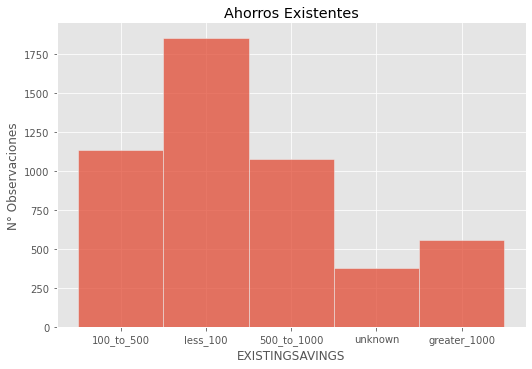

In [12]:
sns.displot(data["EXISTINGSAVINGS"], aspect=1.5)
plt.title("Ahorros Existentes")

plt.ylabel("N° Observaciones")
plt.show()

In [13]:
data["EXISTINGSAVINGS"].describe()

count         5000
unique           5
top       less_100
freq          1856
Name: EXISTINGSAVINGS, dtype: object

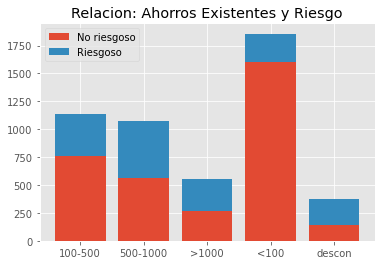

In [14]:
labels1 = ["100-500","500-1000",">1000","<100","descon"]
no_risk = [761,561,265,1600,143]
risk    = [372,517,293,256,232]
width = 0.80


fig,ax=plt.subplots()
ax.bar(labels1,no_risk, width, label="No riesgoso")
ax.bar(labels1,risk, width, label="Riesgoso", bottom=no_risk)

ax.set_title("Relacion: Ahorros Existentes y Riesgo")
ax.legend()
plt.show()

### EMPLOYMENTDURATION

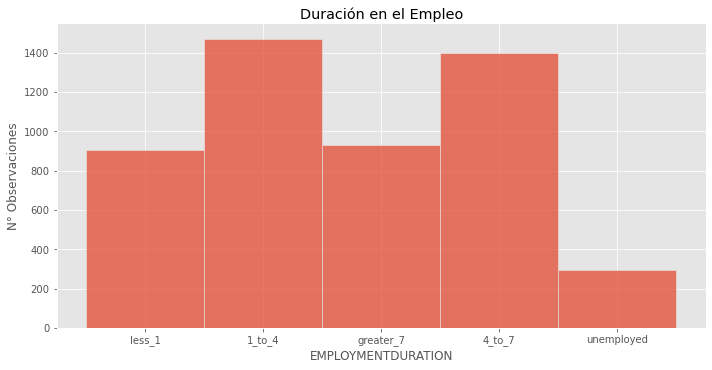

In [15]:
sns.displot(data["EMPLOYMENTDURATION"], aspect=2)
plt.title("Duración en el Empleo")

plt.ylabel("N° Observaciones")
plt.show()

In [16]:
data["EMPLOYMENTDURATION"].describe()

count       5000
unique         5
top       1_to_4
freq        1470
Name: EMPLOYMENTDURATION, dtype: object

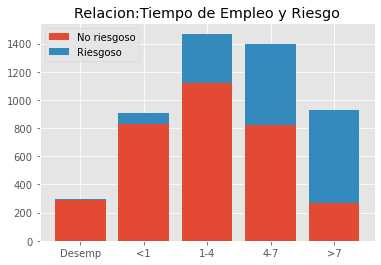

In [17]:
labels1 = ["Desemp","<1","1-4","4-7",">7"]
no_risk = [287,830,1119,824,270]
risk    = [9,74,351,576,660]
width = 0.80


fig,ax=plt.subplots()
ax.bar(labels1,no_risk, width, label="No riesgoso")
ax.bar(labels1,risk, width, label="Riesgoso", bottom=no_risk)

ax.set_title("Relacion:Tiempo de Empleo y Riesgo")
ax.legend()
plt.show()